In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix

In [3]:
url = "/content/Titanic-Dataset.csv"

In [4]:
df = pd.read_csv(url)

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Missing values

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
#to check if there is any mistake in age value
for d in df['Age']:
  if d>112 or d<0:
    print(d)
  if d == 0:
    print(d)


In [9]:
df['Age'].mean()

29.69911764705882

In [10]:
df['Age'].mode()

0    24.0
Name: Age, dtype: float64

In [11]:
df['Age'].median()

28.0

In [12]:
df['Age'] = df['Age'].fillna(df['Age'].mean().astype(int))

In [13]:
df['Age'].isnull().sum()

0

In [14]:
df['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [15]:
#since it has more than 50 percent of missing values and it is not categorical specific we disclude them
df = df.drop(columns = ['Cabin'])

In [16]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [17]:
df['Embarked'] = df['Embarked'].fillna(method = 'bfill')

In [18]:
df['Embarked'].isnull().sum()

0

We use the 'Name' Feature to analyze about Family size, Gender, Noble Title etc.

In [19]:
df['Name'].value_counts()

Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64

In [20]:
# Extract titles from the 'Name' column
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Map rare titles to a common category
df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

# Group common titles
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

# Convert titles to numeric values
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
df['Title'] = df['Title'].map(title_mapping)
df['Title'] = df['Title'].fillna(0)  # Fill NaN values with 0

# Extract last names from the 'Name' column
df['LastName'] = df['Name'].apply(lambda x: x.split(',')[0])

# Determine family size based on last name
df['FamilySize'] = df.groupby('LastName')['LastName'].transform('count')

# Convert family size to categorical variable
def categorize_family_size(size):
    if size == 1:
        return 'Alone'
    elif size < 5:
        return 'Small'
    else:
        return 'Large'

df['FamilySize'] = df['FamilySize'].apply(categorize_family_size)

# Determine if passenger has a noble title
df['NobleTitle'] = df['Name'].apply(lambda x: 1 if 'Count' in x or 'Duke' in x or 'Earl' in x or 'Lady' in x else 0)

# Display the modified DataFrame
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  Title   LastName FamilySize  \
0      0         A/5 21171   7.2500        S      1     Braund      Small   
1      0          PC 17599  71.2833        C      3    Cumings      Alone   
2      0  STON/O2. 3101282   7.9250        S      2  Heikkinen      Alone   
3      0    

In [21]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,LastName,FamilySize,NobleTitle
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,Braund,Small,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,3,Cumings,Alone,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,2,Heikkinen,Alone,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,3,Futrelle,Small,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,Allen,Small,0


In [22]:
df['NobleTitle'].value_counts()

0    889
1      2
Name: NobleTitle, dtype: int64

In [23]:
df['FamilySize'] = df['FamilySize'].map({'Small': 0, 'Alone':1,'Large':2})

In [24]:
 df['FamilySize'].value_counts()

1    534
0    306
2     51
Name: FamilySize, dtype: int64

Text(0, 0.5, 'Count')

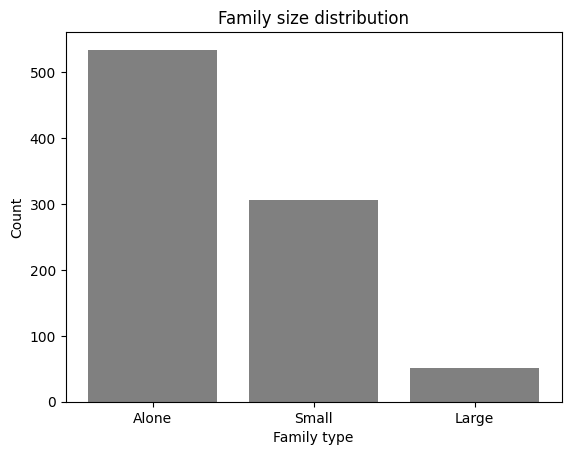

In [25]:
labels = ['Alone','Small','Large']
plt.bar(labels,df['FamilySize'].value_counts(), color = 'Grey')
plt.title("Family size distribution")
plt.xlabel("Family type")
plt.ylabel("Count")

In [26]:
gender = ['Male','Female']
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

Text(0, 0.5, 'Count')

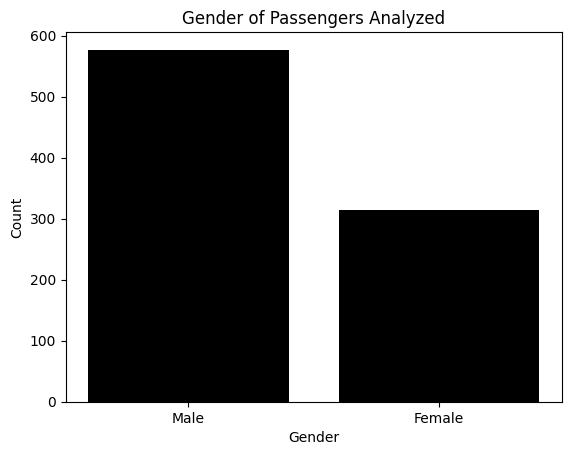

In [27]:
plt.bar(gender,df['Sex'].value_counts(), color = 'Black')
plt.title("Gender of Passengers Analyzed")
plt.xlabel("Gender")
plt.ylabel("Count")


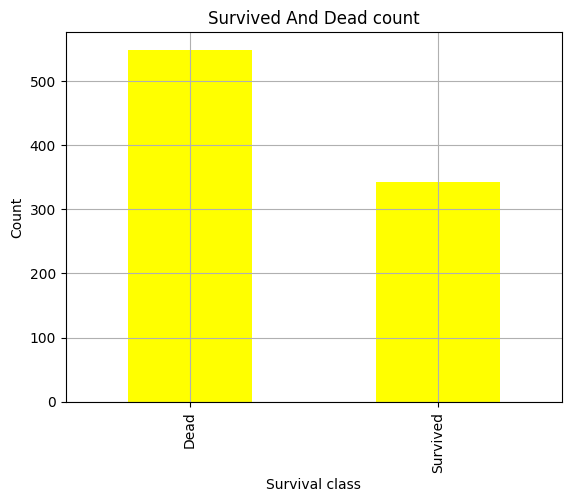

In [28]:
slabel = ['Dead', 'Survived']

# Plot the bar chart
df['Survived'].value_counts().plot(kind='bar', color='yellow')
plt.title("Survived And Dead count")
plt.xlabel("Survival class")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=slabel)  # Set the labels for x-axis ticks
plt.grid()

plt.show()

<Axes: >

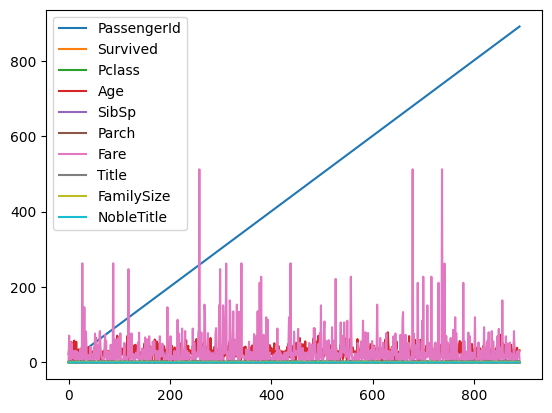

In [29]:
df.plot()

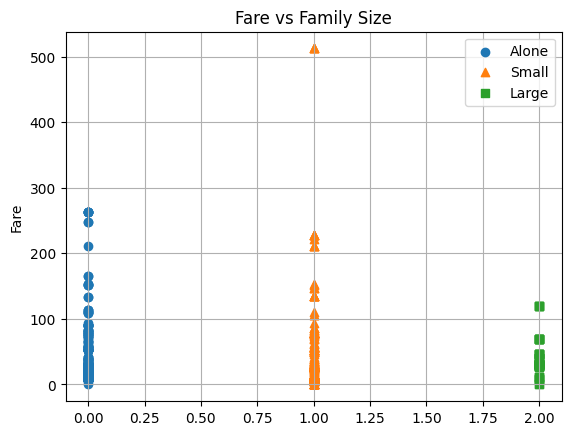

In [30]:
flabel = ['Alone', 'Small', 'Large']

# Define the markers for each category
markers = ['o', '^', 's']

# Iterate over each family size category and plot the corresponding points
for i, label in enumerate(flabel):
    # Filter the data for the current family size category
    data = df[df['FamilySize'] == i]
    # Plot the data points with the corresponding marker
    plt.scatter(data['FamilySize'], data['Fare'], label=label, marker=markers[i])

# Set labels and title
plt.xlabel('')
plt.ylabel('Fare')
plt.title('Fare vs Family Size')
plt.legend()  # Show legend
plt.grid(True)  # Show grid
plt.show()

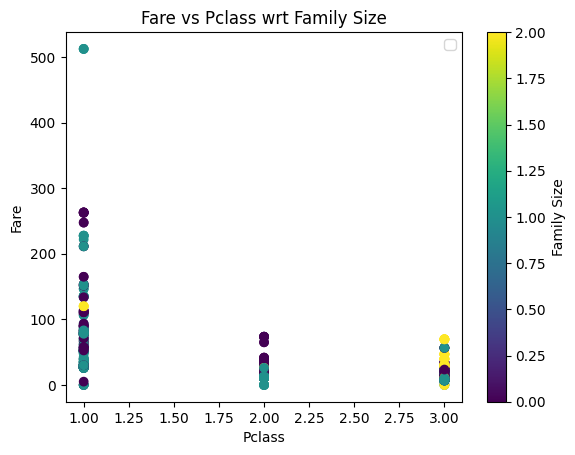

In [31]:
flabels = ['Alone', 'Small', 'Large']

# Scatter plot of 'Pclass' against 'Fare' with different colors for different family sizes
plt.scatter(df['Pclass'], df['Fare'], c=df['FamilySize'], cmap='viridis')

# Set labels and title
plt.xlabel('Pclass')
plt.ylabel('Fare')
plt.title('Fare vs Pclass wrt Family Size')
plt.legend()

# Create a colorbar to represent different family sizes
plt.colorbar(label='Family Size')

# Show plot
plt.show()

<Axes: >

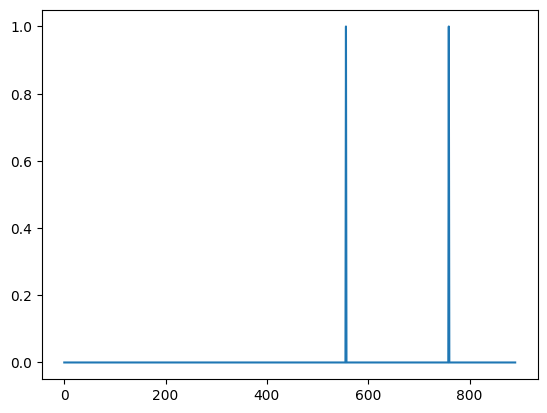

In [32]:
#noble title passengers travelling
df['NobleTitle'].plot()

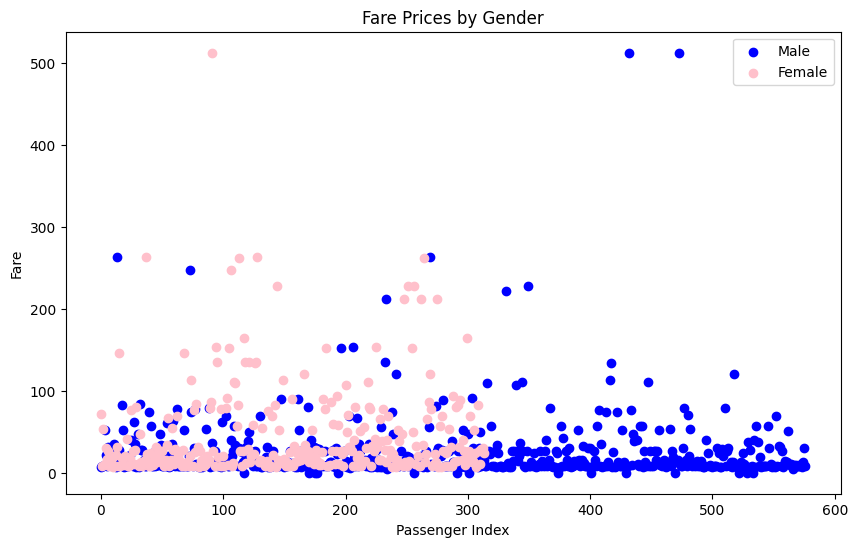

In [33]:
male_fares = df[df['Sex'] == 'male']['Fare']
female_fares = df[df['Sex'] == 'female']['Fare']

# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(range(len(male_fares)), male_fares, color='blue', label='Male')
plt.scatter(range(len(female_fares)), female_fares, color='pink', label='Female')

# Set labels and title
plt.xlabel('Passenger Index')
plt.ylabel('Fare')
plt.title('Fare Prices by Gender')
plt.legend()

# Show plot
plt.show()

Text(0.5, 1.0, 'Mean Fare Prices by Gender')

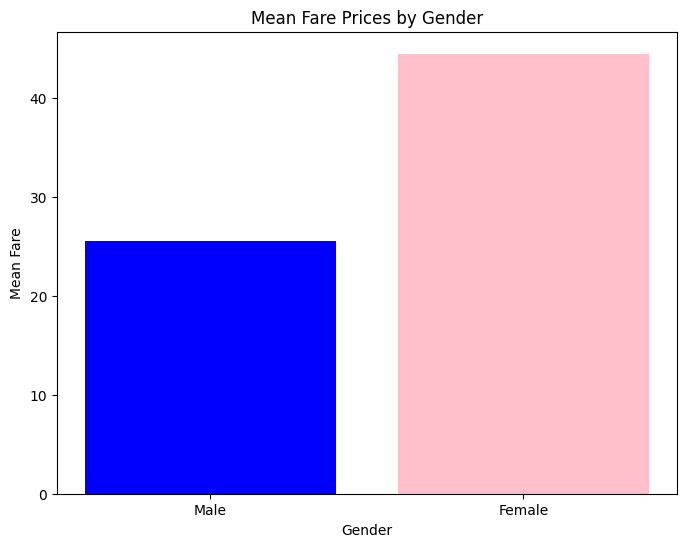

In [34]:

male_mean_fare = male_fares.mean()
female_mean_fare = female_fares.mean()

# Create lists for genders and mean fares
gender = ['Male', 'Female']
mean_fares = [male_mean_fare, female_mean_fare]

# Plot the bar graph
plt.figure(figsize=(8, 6))
plt.bar(gender, mean_fares, color=['blue', 'pink'])

# Set labels and title
plt.xlabel('Gender')
plt.ylabel('Mean Fare')
plt.title('Mean Fare Prices by Gender')


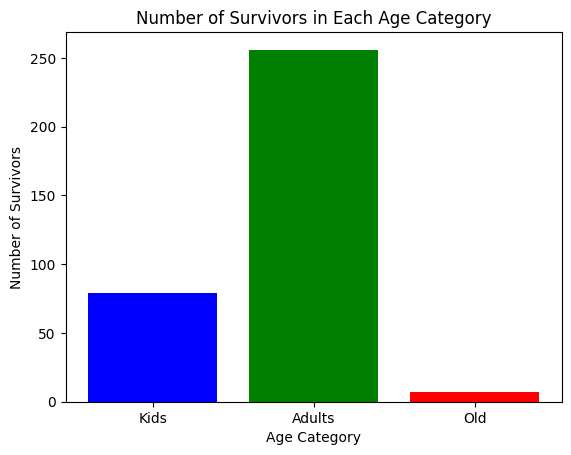

In [35]:
survived_df = df[df['Survived'] == 1]

# Count the number of survivors in each age category
kids_survived = survived_df[survived_df['Age'] < 20].shape[0]
adults_survived = survived_df[(survived_df['Age'] >= 20) & (survived_df['Age'] < 60)].shape[0]
old_survived = survived_df[survived_df['Age'] >= 60].shape[0]

# Plot the bar graph
categories = ['Kids', 'Adults', 'Old']
counts = [kids_survived, adults_survived, old_survived]

plt.bar(categories, counts, color=['blue', 'green', 'red'])
plt.xlabel('Age Category')
plt.ylabel('Number of Survivors')
plt.title('Number of Survivors in Each Age Category')
plt.show()


In [36]:
log = LogisticRegression()

In [37]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,LastName,FamilySize,NobleTitle
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,Braund,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,3,Cumings,1,0


In [48]:
x = df.drop(columns = ['Name','Ticket','LastName','Survived','Sex'])
y = df['Survived']

In [39]:
corr = x.corr()

<ipython-input-39-0543dda664a2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = x.corr()


<Axes: >

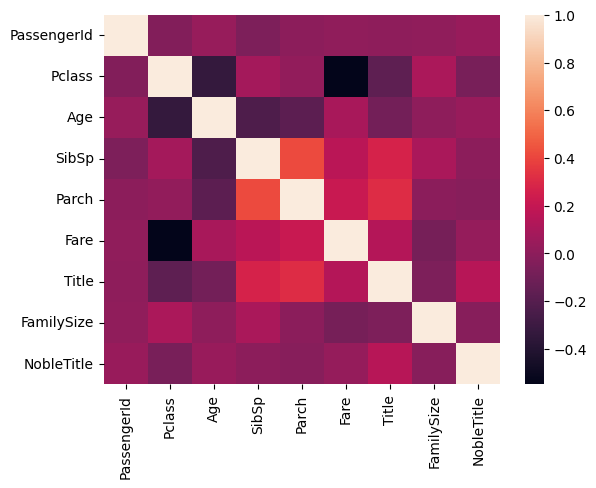

In [40]:
sns.heatmap(corr)

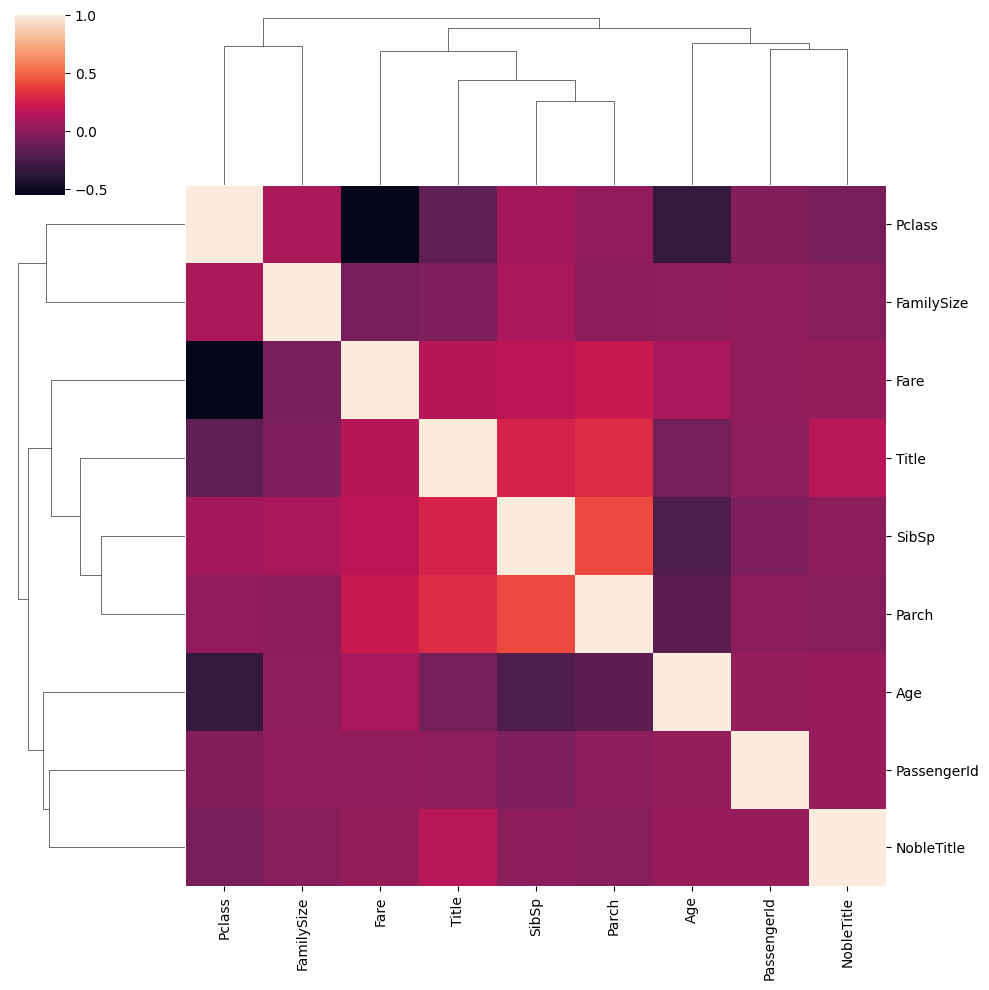

In [41]:
sns.clustermap(corr)

In [49]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y)

In [42]:
df['Embarked'] = df['Embarked'].map({'S':0,'C':1,'Q':2})

In [43]:
df['Sex'] = df['Age'].map({'Male':1,'Female':0})

In [50]:
log.fit(xtrain,ytrain)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [51]:
ypred = log.predict(xtest)

In [52]:
cm = confusion_matrix(ytest,ypred)

<Axes: >

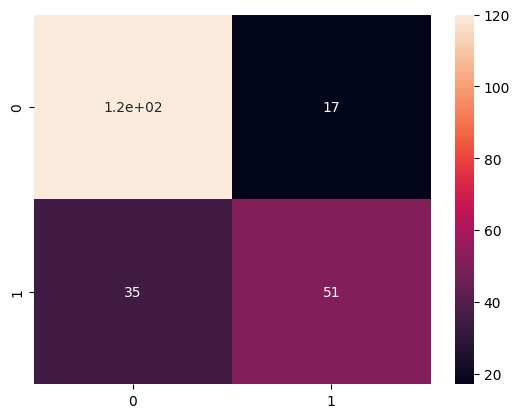

In [53]:
sns.heatmap(cm,annot = True)

In [54]:
cf = classification_report(ytest,ypred)

In [55]:
print(cf)

              precision    recall  f1-score   support

           0       0.77      0.88      0.82       137
           1       0.75      0.59      0.66        86

    accuracy                           0.77       223
   macro avg       0.76      0.73      0.74       223
weighted avg       0.76      0.77      0.76       223



In [57]:
ypre = pd.DataFrame()

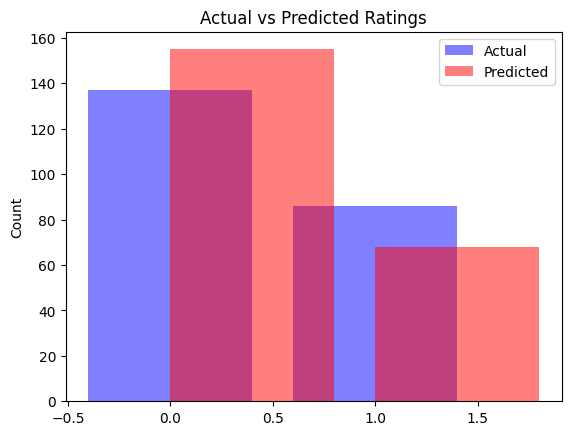

In [62]:
actual_count = ypre['ytest'].value_counts()
predicted_count = ypre['ypred'].value_counts()

# Plot the bar graph
plt.bar(actual_count.index, actual_count.values, color='blue', alpha=0.5, label='Actual')
plt.bar(predicted_count.index + 0.4, predicted_count.values, color='red', alpha=0.5, label='Predicted')
plt.xlabel('')
plt.ylabel('Count')
plt.title('Actual vs Predicted Ratings')
plt.legend()
plt.show()